In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

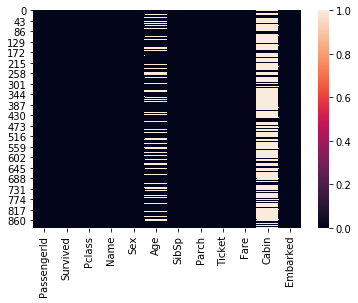

In [10]:
sns.heatmap(df.isnull())

In [11]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

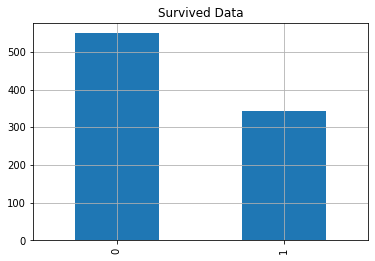

In [12]:
df['Survived'].value_counts().plot(kind='bar',title='Survived Data',grid = True)

In [13]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

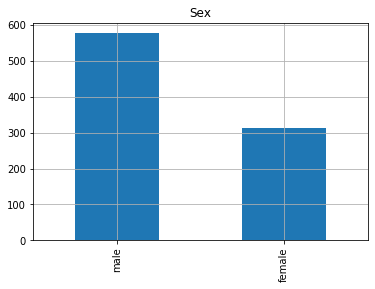

In [14]:
df['Sex'].value_counts().plot(kind='bar',title ='Sex',grid=True)

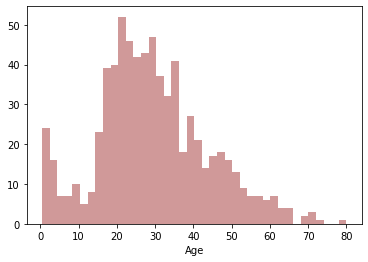

In [15]:
sns.distplot(df['Age'].dropna(),kde = False,color ='darkred',bins = 40)

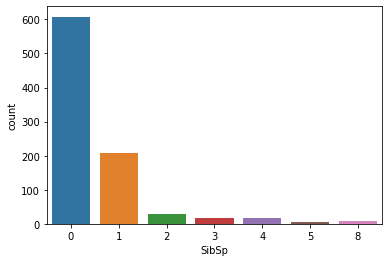

In [16]:
sns.countplot(x='SibSp',data = df)

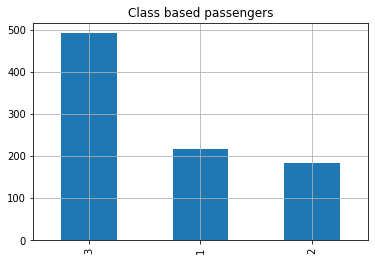

In [17]:
df['Pclass'].value_counts().plot(kind='bar',title='Class based passengers',grid=True)

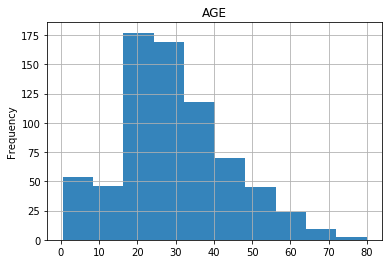

In [18]:
df['Age'].plot(kind = 'hist',title = 'AGE',alpha = .90,grid = True)

In [19]:
class_based = pd.crosstab(df['Pclass'],df['Survived'])
print(class_based)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [20]:
df['Sex2']=df['Sex'].replace(['female','male'],[0,1])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [21]:
sex_based = pd.crosstab(df['Sex'],df['Survived'])
print(sex_based)

Survived    0    1
Sex               
female     81  233
male      468  109


In [22]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [23]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Sex2          -0.618921
dtype: float64

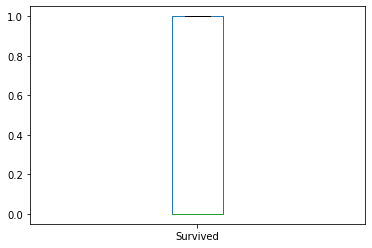

In [24]:
df['Survived'].plot.box()

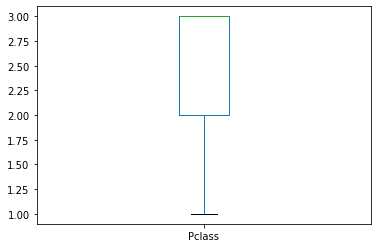

In [25]:
df['Pclass'].plot.box()

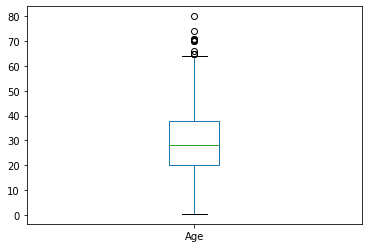

In [26]:
df['Age'].plot.box()

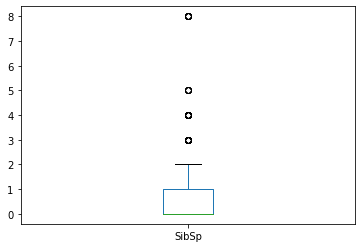

In [27]:
df['SibSp'].plot.box()

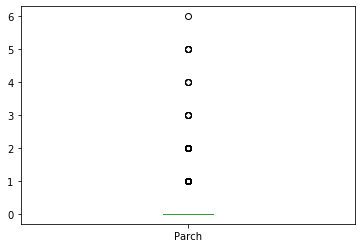

In [28]:
df['Parch'].plot.box()

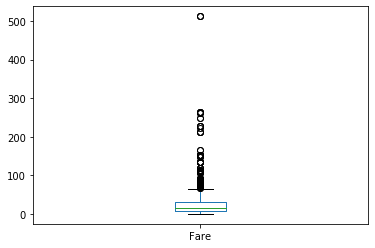

In [29]:
df['Fare'].plot.box()

In [30]:
pd.get_dummies(df['Embarked'],drop_first= True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [31]:
embark=  pd.get_dummies(df['Embarked'],drop_first= True)

In [32]:
df.drop(['Sex','Embarked','Name','Ticket'],axis =1,inplace = True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex2
0,1,0,3,22.0,1,0,7.2500,NaN,1
1,2,1,1,38.0,1,0,71.2833,C85,0
2,3,1,3,26.0,0,0,7.9250,NaN,0
3,4,1,1,35.0,1,0,53.1000,C123,0
4,5,0,3,35.0,0,0,8.0500,NaN,1


In [34]:
df = pd.concat([df,embark],axis =1)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex2,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,1,0,1
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,1,0,1


In [36]:
df.drop('Cabin',axis=1,inplace = True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex2,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [37]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Sex2             0
Q                0
S                0
dtype: int64

In [38]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [39]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex2,Q,S
0,1,0,3,22.000000,1,0,7.2500,1,0,1
1,2,1,1,38.000000,1,0,71.2833,0,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,1
4,5,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1,0,1
887,888,1,1,19.000000,0,0,30.0000,0,0,1
888,889,0,3,29.699118,1,2,23.4500,0,0,1
889,890,1,1,26.000000,0,0,30.0000,1,0,0


In [40]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex2           0
Q              0
S              0
dtype: int64

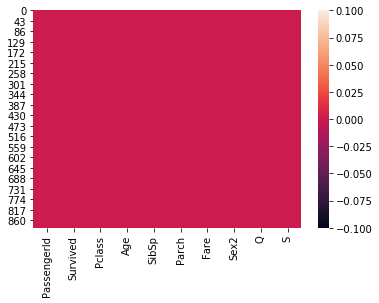

In [41]:
sns.heatmap(df.isnull())

## Regression


In [42]:
x=  df.drop('Survived',axis = 1)
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex2,Q,S
0,1,3,22.000000,1,0,7.2500,1,0,1
1,2,1,38.000000,1,0,71.2833,0,0,0
2,3,3,26.000000,0,0,7.9250,0,0,1
3,4,1,35.000000,1,0,53.1000,0,0,1
4,5,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,1,0,1
887,888,1,19.000000,0,0,30.0000,0,0,1
888,889,3,29.699118,1,2,23.4500,0,0,1
889,890,1,26.000000,0,0,30.0000,1,0,0


In [43]:
y= df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [44]:
x.shape

(891, 9)

In [45]:
y.shape

(891,)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.30,random_state = 101)

In [48]:
x_train.shape

(623, 9)

In [49]:
x_test.shape

(268, 9)

In [50]:
y_train.shape

(623,)

In [51]:
y_test.shape

(268,)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
pred = lr.predict(x_test)
print(pred)

[0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1]


In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [56]:
print('accuracy score: ',accuracy_score(y_test,pred))

accuracy score:  0.7686567164179104


In [57]:
print(confusion_matrix(y_test,pred))

[[134  20]
 [ 42  72]]


In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       154
           1       0.78      0.63      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268



In [59]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_pred = nb.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,nb_pred))

accuracy_score: 0.7649253731343284


In [62]:
print(confusion_matrix(y_test,nb_pred))

[[129  25]
 [ 38  76]]


In [63]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,rf_pred))

accuracy_score: 0.8246268656716418


In [64]:
print(confusion_matrix(y_test,rf_pred))

[[143  11]
 [ 36  78]]


In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,gbc_pred))

accuracy_score: 0.835820895522388


In [67]:
print(confusion_matrix(y_test,gbc_pred))

[[140  14]
 [ 30  84]]


## from above we can find the best fit model is Grandient Boosting Classifier as it is giving the highest accuracy score

#### model saving

In [68]:
import pickle
filename = 'titanic_tested.pkl'
pickle.dump(gbc,open(filename,'wb'))